In [1]:
import matplotlib.pyplot as plt
import random

In [2]:
from typing import List, Tuple, Callable, TypeVar, Iterator

Vector = List[float]
Number = int
Numbers = List[Number]
Matrix = List[Vector]

In [3]:
%run linear_algebra.ipynb

[4, 6, 7]


In [4]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

In [5]:
def square(x):
    return x * x

def derivative(x):
    return 2 * x

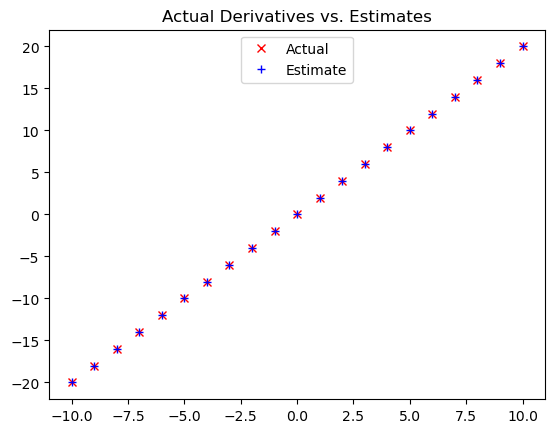

In [6]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.0001) for x in xs]

plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [7]:
def partial_difference_quotient(
    f: Callable[[Vector], float], v: Vector, i: int, h: float
) -> float:
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h


def estimate_gradient(
    f: Callable[[Vector], float], v: Vector, h: float = 0.0001
) -> Vector:
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

In [8]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return v_add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v, grad, -0.01)
    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001

0 [-3.072487257091298, -7.007450685367309, -9.450890621447169]
1 [-3.011037511949472, -6.867301671659963, -9.261872809018225]
2 [-2.950816761710483, -6.729955638226763, -9.07663535283786]
3 [-2.8918004264762733, -6.595356525462228, -8.895102645781103]
4 [-2.833964417946748, -6.463449394952984, -8.717200592865481]
5 [-2.777285129587813, -6.334180407053924, -8.542856581008172]
6 [-2.7217394269960566, -6.207496798912845, -8.371999449388008]
7 [-2.6673046384561356, -6.083346862934588, -8.204559460400247]
8 [-2.613958545687013, -5.961679925675897, -8.040468271192243]
9 [-2.5616793747732727, -5.842446327162379, -7.879658905768398]
10 [-2.510445787277807, -5.725597400619131, -7.72206572765303]
11 [-2.460236871532251, -5.611085452606749, -7.56762441309997]
12 [-2.411032134101606, -5.4988637435546135, -7.416271924837971]
13 [-2.3628114914195737, -5.388886468683522, -7.267946486341211]
14 [-2.3155552615911823, -5.281108739309851, -7.122587556614387]
15 [-2.269244156359359, -5.175486564523654, -6

In [9]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]


def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = predicted - y
    squared_error = error**2
    grad = [2 * error * x, 2 * error]
    return grad

In [10]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

print("slope", slope)
print("intercept", intercept)

0 [32.825498299984844, -0.993923689269681]
1 [11.439398710220853, -0.9691103435911568]
2 [25.703951949939096, -0.9657327241937536]
3 [16.18949831666643, -0.9480973067954269]
4 [22.535656525476696, -0.9400116138651697]
5 [18.30277708589318, -0.9255959341119627]
6 [21.126122087775137, -0.9154419651578457]
7 [19.242961125488826, -0.9024849591397549]
8 [20.499042444339814, -0.8914370280959866]
9 [19.66124725259725, -0.8791551115954548]
10 [20.22006892740604, -0.8677355541196666]
11 [19.847346289866053, -0.8557800140840213]
12 [20.09596424464526, -0.8442211077659871]
13 [19.930147627713847, -0.8324367013058099]
14 [20.04075909561356, -0.8208416802754844]
15 [19.96699284154548, -0.8091592378193199]
16 [20.016206615451345, -0.7975739265021358]
17 [19.98339261356745, -0.7859625720336803]
18 [20.005291164178477, -0.7744072542760455]
19 [19.990696386238678, -0.7628531486033149]
20 [20.0004426572302, -0.7513367459198695]
21 [19.993953410881538, -0.7398336297707997]
22 [19.998293241312243, -0.7283

In [11]:
T = TypeVar('T')

def minibatches(dataset: List[T], batch_size: int, shuffle: bool = True) -> Iterator[List[T]]:
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    if shuffle: random.shuffle(batch_starts)
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [12]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta

assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

print("slope", slope)
print("intercept", intercept)

0 [18.405640031410346, -0.727275234822959]
1 [19.872266862203077, -0.5404050802907215]
2 [19.16389884414596, -0.425984794618819]
3 [19.99992847821768, -0.3915846965638687]
4 [22.1404542237093, -0.2541906983636599]
5 [20.40486235018384, -0.13463768597520243]
6 [20.37230269268243, -0.10424095476632009]
7 [18.87329288282566, -0.029908391406115252]
8 [20.096963596877533, 0.24977247402450659]
9 [18.93037751600612, 0.30932761538676484]
10 [19.732409799765332, 0.5131070614123779]
11 [19.82900699265246, 0.5292664853058304]
12 [19.779128015551724, 0.554283022706786]
13 [19.77587339155846, 0.5811546895336195]
14 [19.533981724497057, 0.6170094503004581]
15 [20.020442495150434, 0.6646108588727845]
16 [20.020121802424754, 0.6919644350282278]
17 [20.86514813770305, 0.7373242012235949]
18 [19.3715509724387, 0.6696636031112263]
19 [18.908958094714006, 0.6987998579370552]
20 [20.639603985609124, 0.6082332899938169]
21 [19.841731926118378, 0.5939235935759515]
22 [20.853239452000878, 0.6452665511110549]


In [13]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta

assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

print("slope", slope)
print("intercept", intercept)

0 [20.100469068187348, -0.0005561973142271031]
1 [20.096157940556346, 0.21398649282280022]
2 [20.092032400782358, 0.41932448188834404]
3 [20.088083851967234, 0.6158526982247571]
4 [20.084304731488402, 0.8039491145227136]
5 [20.080687742527765, 0.9839754869637877]
6 [20.077225931219893, 1.156278050533918]
7 [20.073912659332727, 1.321188185924271]
8 [20.070741520320865, 1.4790230560117357]
9 [20.0677064428945, 1.6300862160945702]
10 [20.064801583045387, 1.7746681982068402]
11 [20.062021344474868, 1.913047069122153]
12 [20.059360412278508, 2.045488965970808]
13 [20.056813620070148, 2.1722486072412948]
14 [20.05437609124699, 2.2935697825564496]
15 [20.05204315236582, 2.4096858227251117]
16 [20.049810325730633, 2.5208200482587824]
17 [20.047673268389723, 2.6271861975640465]
18 [20.045627907687937, 2.7289888387097863]
19 [20.043670297318343, 2.826423763465036]
20 [20.041796671106766, 2.9196783631466086]
21 [20.040003436497337, 3.0089319894723348]
22 [20.03828713691299, 3.094356299329554]
23 